# Linear Regression - Project Exercise

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [24]:
df=pd.read_csv("Ecommerce Customers")

In [25]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [27]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

In [28]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

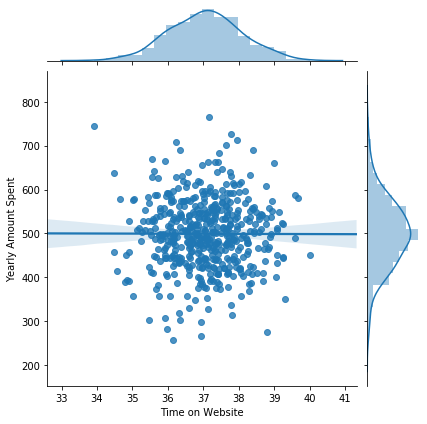

In [29]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent", data=df, kind="reg" )

** Do the same but with the Time on App column instead. **

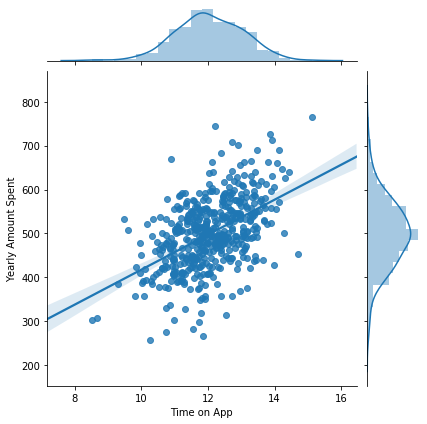

In [30]:
sns.jointplot(x="Time on App",y='Yearly Amount Spent',data=df,kind="reg")

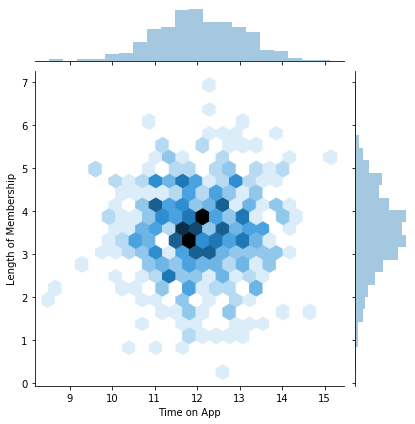

In [31]:
sns.jointplot(x="Time on App", y= "Length of Membership", data=df, kind="hex")

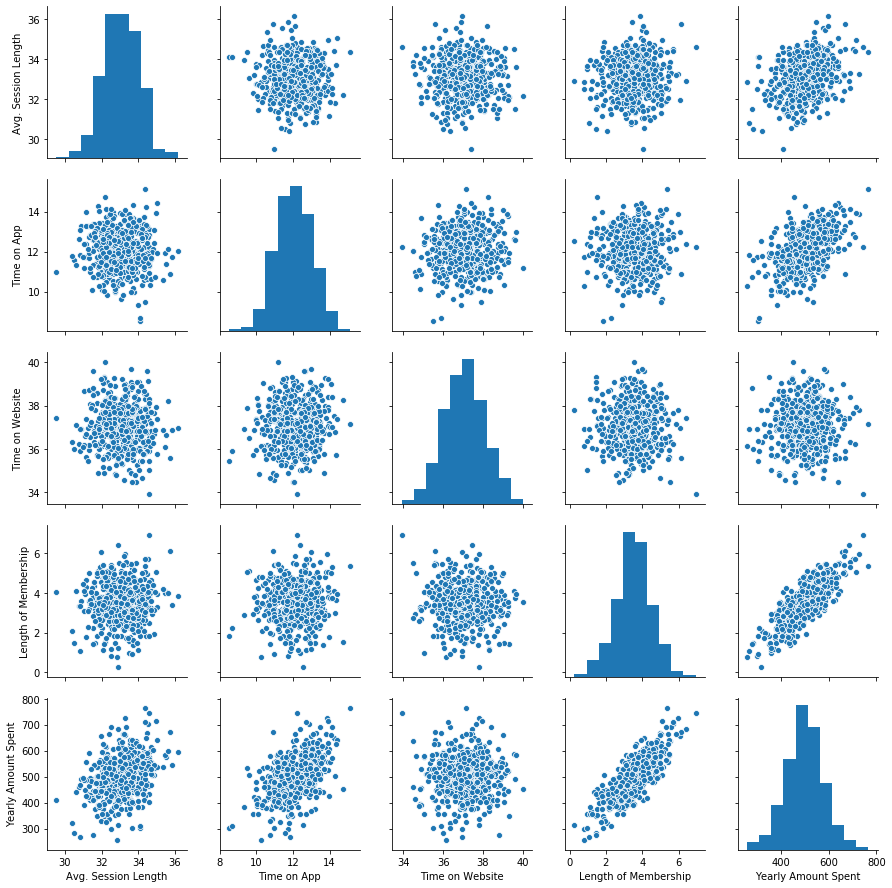

In [32]:
sns.pairplot(df)

In [33]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


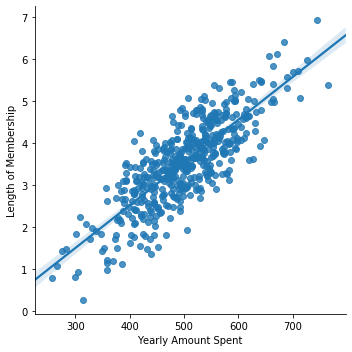

In [34]:
sns.lmplot(x="Yearly Amount Spent", y="Length of Membership", data=df)

## Training and Testing Data

In [35]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [36]:
X=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y=df[['Yearly Amount Spent']]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Training the Model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

## Predicting Test Data


In [48]:
predictions=lm.predict(X_test)

In [49]:
predictions

array([[456.44186104],
       [402.72005312],
       [409.2531539 ],
       [591.4310343 ],
       [590.01437275],
       [548.82396607],
       [577.59737969],
       [715.44428115],
       [473.7893446 ],
       [545.9211364 ],
       [337.8580314 ],
       [500.38506697],
       [552.93478041],
       [409.6038964 ],
       [765.52590754],
       [545.83973731],
       [693.25969124],
       [507.32416226],
       [573.10533175],
       [573.2076631 ],
       [397.44989709],
       [555.0985107 ],
       [458.19868141],
       [482.66899911],
       [559.2655959 ],
       [413.00946082],
       [532.25727408],
       [377.65464817],
       [535.0209653 ],
       [447.80070905],
       [595.54339577],
       [667.14347072],
       [511.96042791],
       [573.30433971],
       [505.02260887],
       [565.30254655],
       [460.38785393],
       [449.74727868],
       [422.87193429],
       [456.55615271],
       [598.10493696],
       [449.64517443],
       [615.34948995],
       [511

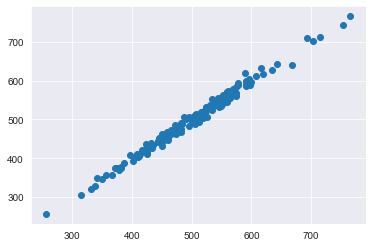

In [53]:
sns.set_style("darkgrid")
plt.scatter(predictions,y_test)

## Evaluating the Model

In [59]:
from sklearn import metrics

In [60]:
metrics.mean_absolute_error(y_test,predictions)

7.228148653430815

In [61]:
metrics.mean_squared_error(y_test,predictions)

79.81305165097429

In [62]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

8.933815066978624

## Residuals

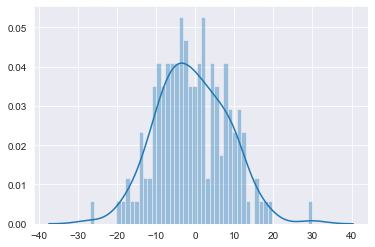

In [63]:
sns.distplot((y_test-predictions),bins=50)

In [70]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [83]:
coeffecients = pd.DataFrame(lm.coef_.flatten(), X.columns, columns = ['Coeffecient']) #.flatten() ile 2d array olan lm.coef_ dizisini 1d arraya çevirdik

In [82]:
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
